In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random 
import torch
from torch.autograd import Variable
import torch.nn


In [2]:
images=np.load('data/images.npy')
labels=np.load('data/labels.npy')
labels=labels.astype(int)
labels[labels!=0]=-1
labels[labels==0]=1
labels[labels==-1]=0


### Number of apples in the test set = 10000

10000


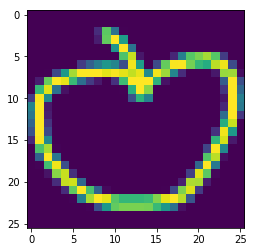

In [3]:
apples=images[labels==1]
print(len(apples))
plt.imshow(apples[0])


## Flattening and normalizing the image

In [4]:
shape_images_flat=(images.shape[0],images.shape[1]*images.shape[2])
images_flat=np.ndarray(shape=shape_images_flat)
for index in range(len(images)):
    images_flat[index]=images[index].flat
images=(images_flat-images_flat.mean())/images.std()


In [5]:
train_images=images[0:40000]
train_labels=labels[0:40000]

validation_images=images[40000:45000]
validation_labels=labels[40000:45000]

test_images=images[45000:50000]
test_labels=labels[45000:50000]

In [7]:
def accuracy(y, y_hat):
    """Compute accuracy.
    Args:
    y: A 1-D int NumPy array.
    y_hat: A 1-D int NumPy array.
    Returns:
    A float, the fraction of time y[i] == y_hat[i].
    """
   
    a=(y==y_hat)
    return a.astype(np.float).mean()

In [8]:
training_accuracy_list=[]
validation_accuracy_list=[]
def compute_accuracy_graph(W):
    train_images_len=len(train_images)
    train_shuffler_list=list(range(0, train_images_len))
    random.shuffle(train_shuffler_list)    
    shuffled_train_images=train_images[train_shuffler_list]
    shuffled_train_labels=train_labels[train_shuffler_list]
    
    shuffled_train_images_used=shuffled_train_images[0:1000]
    shuffled_train_labels_used=shuffled_train_labels[0:1000]
    
    d_train=shuffled_train_images_used.dot(W)
    d_train[d_train>0]=1
    d_train[d_train<=0]=0
    
    
    ac_train=accuracy(shuffled_train_labels_used,d_train)
    training_accuracy_list.append(ac_train)
    

    validation_images_len=len(validation_images)
    validation_shuffler_list=list(range(0, validation_images_len))
    random.shuffle(validation_shuffler_list)    
    shuffled_validation_images=validation_images[validation_shuffler_list]
    shuffled_validation_labels=validation_labels[validation_shuffler_list]  
    
    shuffled_validation_images_used=shuffled_validation_images[0:5000]
    shuffled_validation_labels_used=shuffled_validation_labels[0:5000]
    
    d_validation=shuffled_validation_images_used.dot(W)
    d_validation[d_validation>0]=1
    d_validation[d_validation<=0]=0
    
    ac_validation=accuracy(shuffled_validation_labels_used,d_validation)
    validation_accuracy_list.append(ac_validation)
    
    

# Logistic Code

In [9]:
I=5
learning_rate=.0001
reg=0.001

In [10]:
X=train_images
Y=train_labels

W_tensor=torch.torch.DoubleTensor(X.shape[1]).zero_()
W_tensor=Variable(W_tensor,requires_grad=True)
number_of_images=10000
t=0
m = np.zeros(X.shape[1], dtype=np.float)
v = np.zeros(X.shape[1], dtype=np.float)

M_tensor=torch.torch.DoubleTensor(X.shape[1]).zero_()
V_tensor=torch.torch.DoubleTensor(X.shape[1]).zero_()

M_tensor=Variable(M_tensor,requires_grad=False)
V_tensor=Variable(V_tensor,requires_grad=False)

for epoch in range(0,I):   
    for i in range(0,number_of_images):
        x_tensor=Variable(torch.from_numpy(X[i]),requires_grad=False)
        w_x=torch.dot(x_tensor,W_tensor)
        w_x=torch.sigmoid(w_x)
        esp1, esp2 = 1e-5,1e5
        J=(float(Y[i]))*torch.log(w_x.clamp(esp1,esp2))+(1-float(Y[i]))*torch.log((1-w_x).clamp(esp1,esp2))
        J.backward()
        W_tensor.data += learning_rate * W_tensor.grad.data
        
        if(i%100==0):
            compute_accuracy_graph(W_tensor.data.numpy())

        # Manually zero the gradients after updating weights
        W_tensor.grad.data.zero_()
    
weights_now=W_tensor.data.numpy()


In [11]:
X=test_images
y=test_labels
d=X.dot(weights_now)
d[d>0]=1
d[d<=0]=0
ac=accuracy(y,d)
print(ac)


0.9664


[0 0 0 ..., 0 0 0]


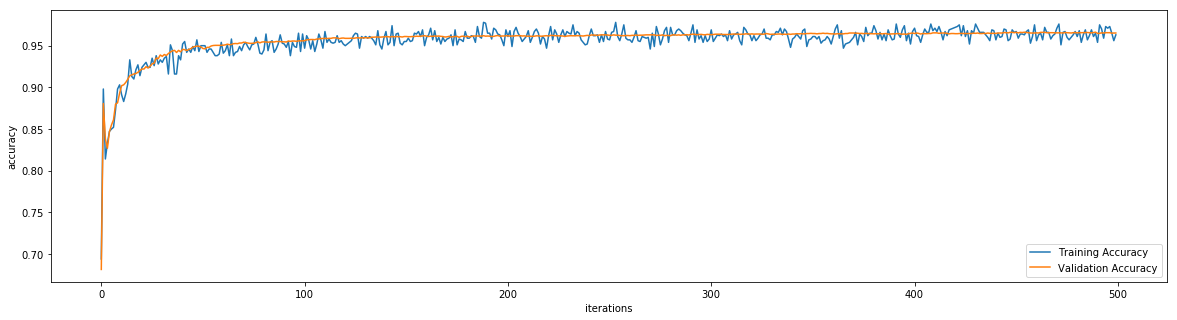

In [12]:
print(y)
plt.figure(figsize=(20, 5))
plt.xlabel('iterations')
plt.ylabel('accuracy')
training_accuracy_line,=plt.plot(training_accuracy_list,label='Training Accuracy')
validation_accuracy_line,=plt.plot(validation_accuracy_list,label='Validation Accuracy')
plt.legend(handles=[training_accuracy_line, validation_accuracy_line])

